In [ ]:
#importam librarii
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [ ]:
data = pd.read_csv('kddcup.data.corrected',header=None) #incarcam datele

In [ ]:
data.groupby(41)[41].count().sort_values(ascending=False)

41
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: 41, dtype: int64

In [ ]:
numeric_data = data.select_dtypes(include=['number']) #selectez doar datele de tip numeric
numeric_data.head(10) #afisez primele 10 randuri

,0,4,5,6,7,8,9,10,11,12,...,31,32,33,34,35,36,37,38,39,40
0,0,215,45076,0,0,0,0,0,1,0,...,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,162,4528,0,0,0,0,0,1,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,236,1228,0,0,0,0,0,1,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,233,2032,0,0,0,0,0,1,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,239,486,0,0,0,0,0,1,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
5,0,238,1282,0,0,0,0,0,1,0,...,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0
6,0,235,1337,0,0,0,0,0,1,0,...,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0
7,0,234,1364,0,0,0,0,0,1,0,...,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0
8,0,239,1295,0,0,0,0,0,1,0,...,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0
9,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0


In [ ]:
numeric_data.shape #afisam dimensiunile datelor

(4898431, 38)

In [ ]:
scaled_data = StandardScaler().fit_transform(numeric_data)
#scalam datele doarece avem coloane care contin date pe o plaja mai larga de valori

scaled_data_imputed = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()).fit_transform(scaled_data)
#inlocuim valorile NaN cu media

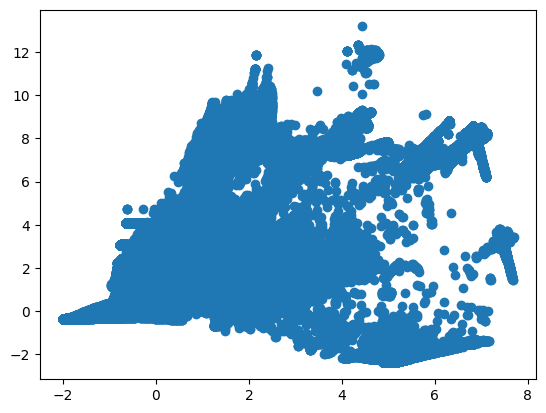

In [ ]:
pca_data = PCA(n_components=2).fit_transform(scaled_data_imputed) #aplicam pca pentru a reduce dimensiunea
plt.scatter(pca_data[:, 0], pca_data[:, 1]) #plotam datele

In [ ]:
pca_data.shape #afisam dimensiunile datelor dupa reducerea dimensionala

(4898431, 2)

In [ ]:
#definim K pentru care se vor testa numărul de clustere
K=np.arange(1, 10, 2)

#initializam o lista pentru a retine suma patratelor distantelor medii din fiecare cluster
wcss = []

for k in K:
    kmeans = KMeans(n_clusters=k) #initializam modelul kmeans cu numarul curent de clustere
    kmeans.fit(pca_data) #aplicam KMeanspe datele noastre
    wcss.append(kmeans.inertia_) #calculam within-cluster sum of squares
    print(k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


Text(0.5, 1.0, 'Cluster')

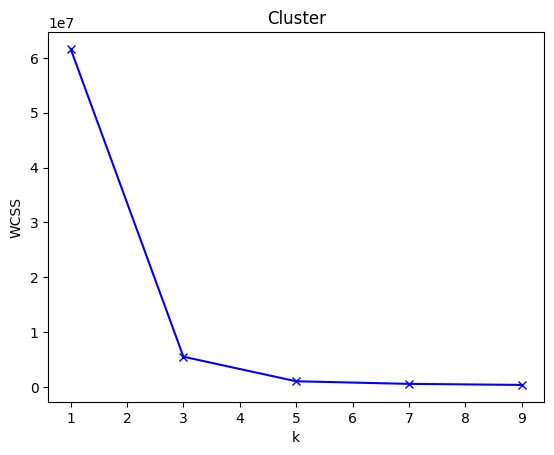

In [ ]:
#plotam graficul pentru metoda "elbow"
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Cluster')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


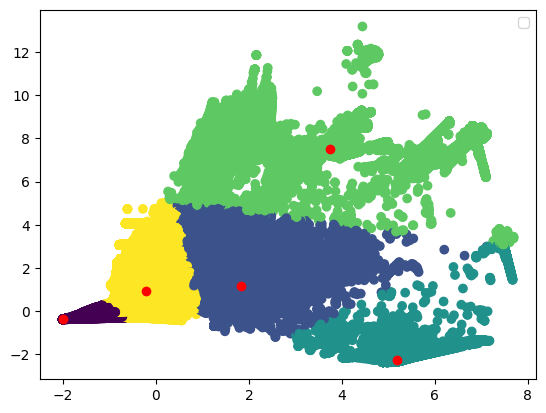

In [ ]:
model = KMeans(n_clusters = 5) #initializam modelul kmeans cu numarul optim de clustere pe care l-am identificat
model.fit(pca_data) #aplicam KMeans pe datele noastre
#plotam rezultatele
labels = model.labels_
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.scatter(centroids_x,centroids_y, color='red')
plt.legend()